### Desarrollo de algoritmos de ensamblado

## Implementación de paralelismo con Dask

## **Conjunto de datos sobre diabetes**
Este conjunto de datos proviene del Instituto Nacional de Diabetes y
Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene diabetes,
basándose en ciertas mediciones de diagnóstico incluidas en el conjunto de datos.
En particular, todos los pacientes aquí son mujeres de al menos 21 años de edad de ascendencia india

Información sobre los atributos del conjunto de datos -

Embarazos: Para expresar el Número de embarazos

Glucosa: Para expresar el nivel de glucosa en sangre.

BloodPressure: Para expresar la medición de la presión arterial.

SkinThickness: Para expresar el grosor de la piel.

Insulina: Para expresar el nivel de insulina en sangre.

IMC: Para expresar el índice de masa corporal.

DiabetesPedigreeFunción: Expresar el porcentaje de Diabetes.

Edad: Para expresar la edad.

Resultado: Para expresar el resultado final 1 es Sí y 0 es No

https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [ ]:
# Iniciar un cliente Dask
from dask.distributed import Client
client = Client(n_workers=4, threads_per_worker=2)
client


INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/scheduler-r29skcoj', purging
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:39623
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39141'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45823'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33599'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40741'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:43995', name: 2, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:43995
INFO:distributed.core:Starting established connection to

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 12.67 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39623,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 12.67 GiB
Comm: tcp://127.0.0.1:44081,Total threads: 2
Dashboard: http://127.0.0.1:38829/status,Memory: 3.17 GiB
Nanny: tcp://127.0.0.1:39141,


In [ ]:
#Revisamos el contenido de la data
import dask.dataframe as dd

data1 = dd.read_csv('/content/diabetes.csv')
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Predice si tiene diabetes sabiendo su nivel de glucosa,  índice de masa corporal y edad

In [ ]:
pip install dask_ml

In [ ]:
from dask_ml.model_selection import train_test_split
import time
X = data1[['Glucose','BMI','Age']]  # Seleccionamos las características adecuadas
y = data1['Outcome']

# Medir el tiempo de ejecución
start_time0 = time.time()

# Divide tus datos en conjuntos de entrenamiento y prueba, utilizamos stratify para distribuir bien la cantidades de datos para las clases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True,)#,stratify=y


# Calcular el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time0

print("Tiempo de ejecución: {:.2f} segundos".format(execution_time))

Tiempo de ejecución: 0.01 segundos


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((Delayed('int-dbf9a011-5cd5-4840-8378-723ea692008a'), 3),
 (dd.Scalar<size-ag..., dtype=int64>,),
 (Delayed('int-3f96f594-9a1d-4da9-856b-5c1598bbed65'), 3),
 (dd.Scalar<size-ag..., dtype=int64>,))

In [ ]:
y_train.compute()

128    1
355    1
591    0
97     0
186    1
      ..
345    0
448    1
75     0
532    0
429    1
Name: Outcome, Length: 619, dtype: int64

### **XGBoost:**

## **Con Dask**

In [ ]:
pip install dask_xgboost

In [ ]:
pip install xgboost

In [ ]:
import dask
import xgboost
import dask_xgboost
import psutil

In [ ]:
params = {'objective': 'binary:logistic',
          'max_depth': 4, 'eta': 0.01, 'subsample': 0.5,
          'min_child_weight': 0.5}

# Medir tiempo y uso de recursos antes del entrenamiento
start_time0 = time.time()
cpu_usage_before = psutil.cpu_percent(interval=1)
memory_usage_before = psutil.virtual_memory().percent


bst = dask_xgboost.train(client, params, X_train, y_train, num_boost_round=10)


# Medir tiempo y uso de recursos después del entrenamiento
end_time = time.time()
execution_time = end_time - start_time0
cpu_usage_after = psutil.cpu_percent(interval=1)
memory_usage_after = psutil.virtual_memory().percent
print("Tiempo de ejecución: {:.2f} segundos".format(execution_time))
print(f'CPU antes del entrenamiento: {cpu_usage_before}%')
print(f'CPU después del entrenamiento: {cpu_usage_after}%')
print(f'Memoria antes del entrenamiento: {memory_usage_before}%')
print(f'Memoria después del entrenamiento: {memory_usage_after}%')



INFO:distributed.worker:Run out-of-band function 'start_tracker'
Exception in thread Thread-11 (join):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?


Tiempo de ejecución: 4.92 segundos
CPU antes del entrenamiento: 85.4%
CPU después del entrenamiento: 100.0%
Memoria antes del entrenamiento: 12.4%
Memoria después del entrenamiento: 13.5%


In [ ]:
bst

In [ ]:
y_hat = dask_xgboost.predict(client, bst, X_test)
y_hat

dask.array<values, shape=(nan,), dtype=float32, chunksize=(nan,), chunktype=numpy.ndarray>

In [ ]:
results = y_hat.compute()


In [ ]:
import numpy as np

predictions_binarias = np.round(results).astype(int)

# Imprimir las predicciones binarias
print("\nPredicciones binarias (redondeadas):")
print(predictions_binarias)

# Opcional: aplicar un umbral para convertir las probabilidades en etiquetas de clase binarias
umbral = 0.5
predictions_umbral = (results >= umbral).astype(int)

# Imprimir las predicciones con umbral
print("\nPredicciones binarias con umbral de {}: ".format(umbral))
print(predictions_umbral)


Predicciones binarias (redondeadas):
[1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0]

Predicciones binarias con umbral de 0.5: 
[1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0]


In [ ]:
y_test.head(10)

622    0
25     1
191    0
332    1
113    0
502    1
728    0
316    0
290    0
364    0
Name: Outcome, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predictions_umbral )
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 74.50%


In [ ]:
from sklearn.metrics import roc_curve

y_test, y_hat = dask.compute(y_test, y_hat)
fpr, tpr, _ = roc_curve(y_test, y_hat)

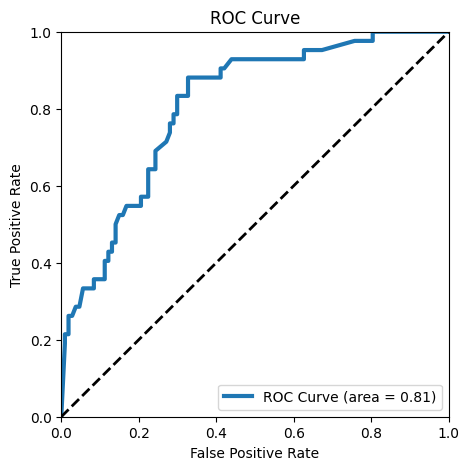

In [ ]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(fpr, tpr, lw=3,
        label='ROC Curve (area = {:.2f})'.format(auc(fpr, tpr)))
ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set(
    xlim=(0, 1),
    ylim=(0, 1),
    title="ROC Curve",
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)
ax.legend();
plt.show()

## **Con Pyspark**

In [ ]:
pip install sparkxgb

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 7.8 MB/s eta 0:00:00
  Created wheel for sparkxgb: filename=sparkxgb-0.1-py3-none-any.whl size=5629 sha256=b469faa67a931a236224871d2a38c9e641029a2b215fd876ce811b974c75884b
  Stored in directory: /root/.cache/pip/wheels/b7/0c/a1/786408e13056fabeb8a72134e101b1e142fc95905c7b0e2a71
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767581 sha256=055c2f090f8a7d8c7f36c671eb4be5ecdb8759b18060c6f3e677a2494ff241e9
  Stored in directory: /root/.cache/pip/wheels/a0/3f/72/8efd988f9ae041f051c75e6834cd92dd6d13a726e206e8b6f3
Successfully built sparkxgb pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
pip install py4j

In [ ]:
pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
# Iniciar el servidor PySpark
# "local[4]" indica que Spark debe usar 4 núcleos de CPU.
spark = SparkSession.builder \
    .appName('cluster') \
    .master("local[4]") \
    .getOrCreate()
print('Spark Version: {}'.format(spark.version))

Spark Version: 3.1.1


In [ ]:
#Cargar los datos
dataset = spark.read.csv("/content/diabetes.csv",header=True,inferSchema=True)

#show permite mostrar los datos del archivo
dataset.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [ ]:
# VectorAssembler para convertir las columnas de características en un solo vector
from pyspark.ml.feature import VectorAssembler

vec_assembler = VectorAssembler(inputCols = ['Glucose','BMI','Age','Outcome'],
                                outputCol='Caracteristicas')

data_final = vec_assembler.transform(dataset)
data_final.select('Caracteristicas').show(5)

+--------------------+
|     Caracteristicas|
+--------------------+
|[148.0,33.6,50.0,...|
|[85.0,26.6,31.0,0.0]|
|[183.0,23.3,32.0,...|
|[89.0,28.1,21.0,0.0]|
|[137.0,43.1,33.0,...|
+--------------------+
only showing top 5 rows



In [ ]:
import time

In [ ]:
# Medir el tiempo de ejecución
start_time0 = time.time()

train, test = data_final.randomSplit(weights=[0.8,0.2], seed=30)

# Calcular el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time0

print("Tiempo de ejecución: {:.2f} segundos".format(execution_time))

Tiempo de ejecución: 0.04 segundos


In [ ]:
train.count()

617

In [ ]:
test.count()

151

In [ ]:
!pip install xgboost

In [ ]:
import time
import psutil
from xgboost.spark import SparkXGBClassifier



xgb_classifier = SparkXGBClassifier(features_col="Caracteristicas",  label_col="Outcome",  num_workers=2)


# Medir tiempo y uso de recursos antes del entrenamiento
start_time0 = time.time()
cpu_usage_before = psutil.cpu_percent(interval=1)
memory_usage_before = psutil.virtual_memory().percent

# Entrenar el modelo
model=xgb_classifier.fit(train)

# Medir tiempo y uso de recursos después del entrenamiento
end_time = time.time()
execution_time = end_time - start_time0
cpu_usage_after = psutil.cpu_percent(interval=1)
memory_usage_after = psutil.virtual_memory().percent
print("Tiempo de ejecución: {:.2f} segundos".format(execution_time))
print(f'CPU antes del entrenamiento: {cpu_usage_before}%')
print(f'CPU después del entrenamiento: {cpu_usage_after}%')
print(f'Memoria antes del entrenamiento: {memory_usage_before}%')
print(f'Memoria después del entrenamiento: {memory_usage_after}%')

INFO:XGBoost-PySpark:Running xgboost-2.0.3 on 2 workers with
	booster params: {'objective': 'binary:logistic', 'device': 'cpu', 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Finished xgboost training!


Tiempo de ejecución: 20.43 segundos
CPU antes del entrenamiento: 95.0%
CPU después del entrenamiento: 95.5%
Memoria antes del entrenamiento: 13.9%
Memoria después del entrenamiento: 18.0%


In [ ]:
#Realizar predicciones
predictions_prob =model.transform(test)
predictions_prob.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+--------------------+----------+--------------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|     Caracteristicas|       rawPrediction|prediction|         probability|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+--------------------+----------+--------------------+
|          0|     74|           52|           10|     36|27.8|                   0.269| 22|      0|[74.0,27.8,22.0,0.0]|[6.02069520950317...|       0.0|[0.99757790565490...|
|          0|     78|           88|           29|     40|36.9|                   0.434| 21|      0|[78.0,36.9,21.0,0.0]|[6.02069520950317...|       0.0|[0.99757790565490...|
|          0|     86|           68|           32|      0|35.8|                   0.238| 25|      0|[86.0,35.8,25.0,0.0]|[6.0206952

In [ ]:
# Show the predictions with predicted labels
predictions_prob.select("Outcome", "prediction", "probability").show(5)

+-------+----------+--------------------+
|Outcome|prediction|         probability|
+-------+----------+--------------------+
|      0|       0.0|[0.99757790565490...|
|      0|       0.0|[0.99757790565490...|
|      0|       0.0|[0.99757790565490...|
|      0|       0.0|[0.99757790565490...|
|      0|       0.0|[0.99757790565490...|
+-------+----------+--------------------+
only showing top 5 rows



In [ ]:
test.select("Outcome").show(5)

+-------+
|Outcome|
+-------+
|      0|
|      0|
|      0|
|      0|
|      0|
+-------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Evaluar el modelo
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions_prob)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
# Cerrar la sesión de Spark al finalizar
spark.stop()

## **Con scikit-learn**

In [ ]:
#Revisamos el contenido de la data
import pandas as pd
data2=pd.read_csv('diabetes.csv')
data2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.model_selection import train_test_split
X = data2[['Glucose','BMI','Age']]  # Seleccionamos las características adecuadas
y = data2['Outcome']
import time
# Medir el tiempo de ejecución
start_time0 = time.time()

# Divide tus datos en conjuntos de entrenamiento y prueba, utilizamos stratify para distribuir bien la cantidades de datos para las clases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Calcular el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time0

print("Tiempo de ejecución: {:.2f} segundos".format(execution_time))


Tiempo de ejecución: 0.01 segundos


In [ ]:
import xgboost as xgb

# Crear el clasificador de XGBoost
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Medir tiempo y uso de recursos antes del entrenamiento
start_time1 = time.time()
cpu_usage_before = psutil.cpu_percent(interval=1)
memory_usage_before = psutil.virtual_memory().percent

# Entrenar el modelo
xgb_classifier.fit(X_train, y_train)

# Medir tiempo y uso de recursos después del entrenamiento
end_time = time.time()
execution_time = end_time - start_time1
cpu_usage_after = psutil.cpu_percent(interval=1)
memory_usage_after = psutil.virtual_memory().percent
print("Tiempo de ejecución: {:.2f} segundos".format(execution_time))
print(f'CPU antes del entrenamiento: {cpu_usage_before}%')
print(f'CPU después del entrenamiento: {cpu_usage_after}%')
print(f'Memoria antes del entrenamiento: {memory_usage_before}%')
print(f'Memoria después del entrenamiento: {memory_usage_after}%')




# Predicción en el conjunto de prueba
predictions_xgb = xgb_classifier.predict(X_test)


Tiempo de ejecución: 1.09 segundos
CPU antes del entrenamiento: 71.0%
CPU después del entrenamiento: 72.0%
Memoria antes del entrenamiento: 19.7%
Memoria después del entrenamiento: 19.7%


In [ ]:
y_test.head(10)

44     0
672    0
700    0
630    1
81     0
389    0
387    1
408    1
163    0
335    0
Name: Outcome, dtype: int64

In [ ]:
predictions_xgb[:10]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions_xgb)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 75.32%


In [ ]:
from sklearn.metrics import precision_score
#Calcula la precisión para cada clase individualmente y luego toma la media.
precision = precision_score(y_test, predictions_xgb, average='macro')
print(precision)

0.7290384615384615
